In [1]:
import os
import pandas as pd
import numpy as np
from pandas import read_csv

In [2]:
os.chdir("D:\INTERNSHIP\P2")

In [3]:
df =  pd.read_csv("data.csv")

In [4]:
df.shape

(173, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [6]:
df.head(200)

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


In [7]:
data1 = df.copy()

In [8]:
df = pd.read_csv('data.csv', index_col=0,header=0,  parse_dates=True)

In [9]:
df

,Daily Visitors
Date,
2021-01-10,2649
2021-02-10,2000
2021-03-10,2011
2021-04-10,3219
2021-05-10,3870
...,...
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534


In [10]:
data= df.copy()

<AxesSubplot:xlabel='Date'>

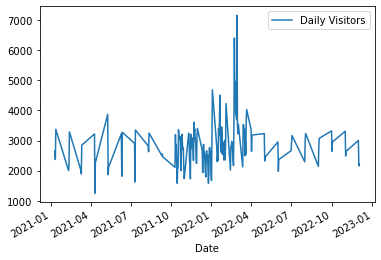

In [11]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
df.plot()


In [12]:
df.describe()

,Daily Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


array([[<AxesSubplot:title={'center':'Daily Visitors'}>]], dtype=object)

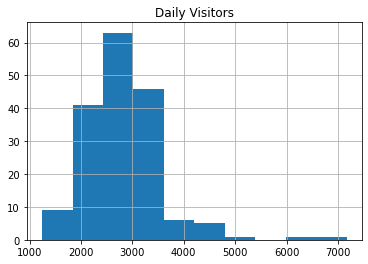

In [13]:
df.hist()

<AxesSubplot:ylabel='Density'>

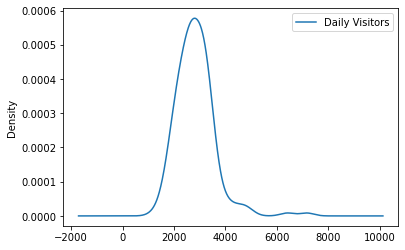

In [14]:
df.plot(kind='kde')

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

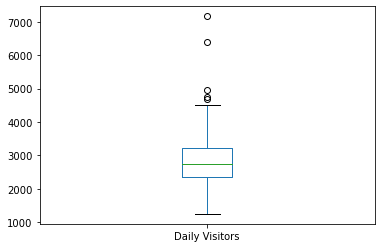

In [16]:
# Boxplot for ever
df.plot.box()

In [17]:
df.isnull().sum()

Daily Visitors    0
dtype: int64

In [18]:
df

,Daily Visitors
Date,
2021-01-10,2649
2021-02-10,2000
2021-03-10,2011
2021-04-10,3219
2021-05-10,3870
...,...
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534


In [19]:
df[df.duplicated()]

,Daily Visitors
Date,
2022-02-18,2594
2022-03-20,2534


In [20]:
#rename column
df= df.rename({'Daily Visitors': 'visitors'},axis =1)

In [21]:
df

,visitors
Date,
2021-01-10,2649
2021-02-10,2000
2021-03-10,2011
2021-04-10,3219
2021-05-10,3870
...,...
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534


In [22]:
df_ma = df.rolling(window=5).mean()

<AxesSubplot:xlabel='Date'>

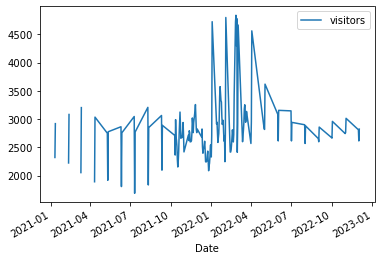

In [23]:
df_ma.plot()

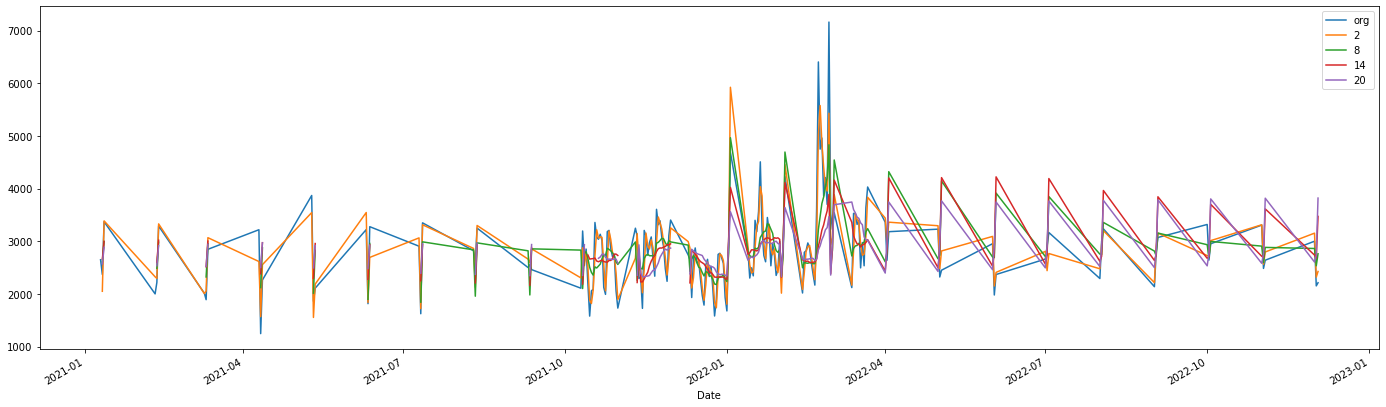

In [24]:
plt.figure(figsize=(24,7))
df.visitors.plot(label="org")
for i in range(2,24,6):
    df["visitors"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [25]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [26]:
test_result=adfuller(df['visitors'])

In [27]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(visitors):
    result=adfuller(visitors)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [28]:
adfuller_test(df['visitors'])

ADF Test Statistic : -2.3585866739043726
p-value : 0.15376766558874538
#Lags Used : 14
Number of Observations Used : 158
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Base Model

In [29]:
df_base = pd.concat([df,df.shift(1)],axis=1)

In [30]:
df_base

,visitors,visitors
Date,,
2021-01-10,2649,NaN
2021-02-10,2000,2649.0
2021-03-10,2011,2000.0
2021-04-10,3219,2011.0
2021-05-10,3870,3219.0
...,...,...
2022-03-18,2494,3399.0
2022-03-19,2976,2494.0
2022-03-20,2534,2976.0


In [31]:
df_base.columns =['Actual_visitors','Forecast_visitors']

In [32]:
df_base

,Actual_visitors,Forecast_visitors
Date,,
2021-01-10,2649,NaN
2021-02-10,2000,2649.0
2021-03-10,2011,2000.0
2021-04-10,3219,2011.0
2021-05-10,3870,3219.0
...,...,...
2022-03-18,2494,3399.0
2022-03-19,2976,2494.0
2022-03-20,2534,2976.0


In [33]:
df_base.dropna(inplace = True)

In [34]:
df_base

,Actual_visitors,Forecast_visitors
Date,,
2021-02-10,2000,2649.0
2021-03-10,2011,2000.0
2021-04-10,3219,2011.0
2021-05-10,3870,3219.0
2021-06-10,3222,3870.0
...,...,...
2022-03-18,2494,3399.0
2022-03-19,2976,2494.0
2022-03-20,2534,2976.0


In [35]:
df['visitors First Difference'] = df['visitors'] - df['visitors'].shift(5)

In [36]:
df['visitors'].shift(1)

Date
2021-01-10       NaN
2021-02-10    2649.0
2021-03-10    2000.0
2021-04-10    2011.0
2021-05-10    3219.0
               ...  
2022-03-18    3399.0
2022-03-19    2494.0
2022-03-20    2976.0
2022-03-21    2534.0
2022-03-22    3641.0
Name: visitors, Length: 173, dtype: float64

In [37]:
df['visitors First Difference']=df['visitors']-df['visitors'].shift(10)

In [38]:
df.head(14)

,visitors,visitors First Difference
Date,,
2021-01-10,2649,NaN
2021-02-10,2000,NaN
2021-03-10,2011,NaN
2021-04-10,3219,NaN
2021-05-10,3870,NaN
2021-06-10,3222,NaN
2021-07-10,2906,NaN
2021-08-10,2821,NaN
2021-09-10,2500,NaN


In [39]:
## Again test dickey fuller test
adfuller_test(df['visitors First Difference'].dropna())

ADF Test Statistic : -3.0130768205158565
p-value : 0.03369110515243718
#Lags Used : 14
Number of Observations Used : 148
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

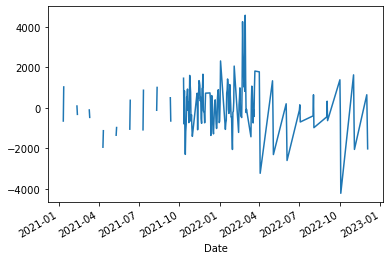

In [40]:
df['visitors First Difference'].plot()

# Auto Regressive Model

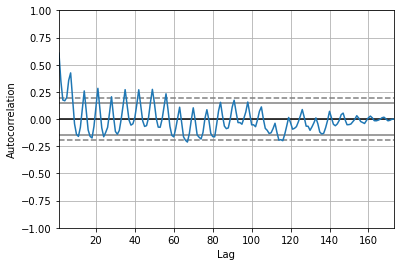

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['visitors'])
plt.show()

# Autocorrelation and Partial Autocorrelation

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['visitors First Difference'].iloc[11:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['visitors First Difference'].iloc[11:],lags=10,ax=ax2)

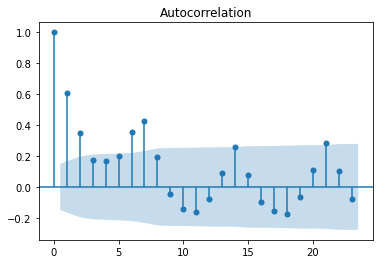

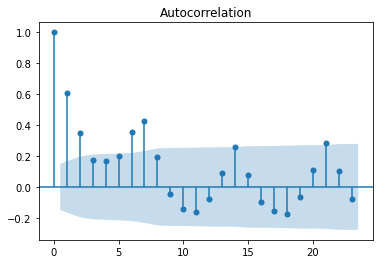

In [43]:
plot_acf(data)

In [44]:
# q=1,p=1,d=0-2

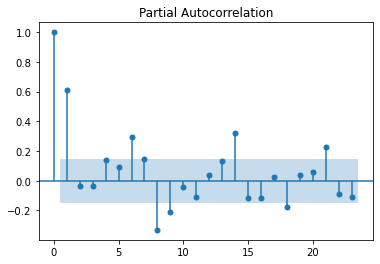

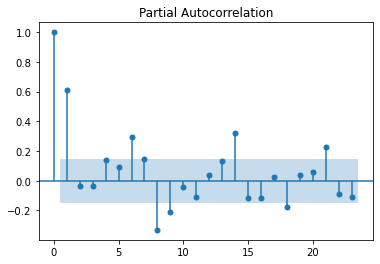

In [45]:
plot_pacf(data)

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
df_train = data.head(160)

In [48]:
df_test = data.tail(13)

In [49]:
df_test

,Daily Visitors
Date,
2022-10-03,2953
2022-11-03,2640
2022-12-03,2212
2022-03-13,2120
2022-03-14,3530
2022-03-15,3524
2022-03-16,3320
2022-03-17,3399
2022-03-18,2494


# ARIMA

In [50]:
df_model = ARIMA(df_train,order=(1,1,0))

C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [51]:
df_model_fit=df_model.fit()

In [52]:
df_model_fit.aic

2524.862501159727

In [53]:
forecast=df_model_fit.forecast(steps=13)[0]

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
np.sqrt(mean_squared_error(df_test,forecast))

575.356276757947

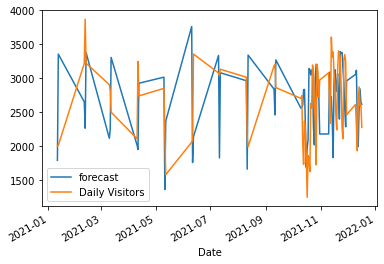

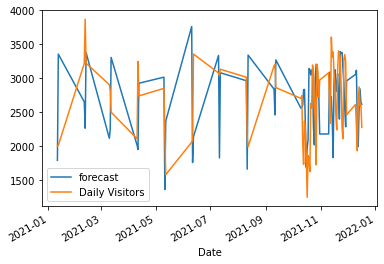

In [56]:
df_model_fit.plot_predict(1, 77)

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [58]:
data1 = pd.read_csv('data.csv',header=0,  parse_dates=True)

In [59]:
data1

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


In [60]:
data1= data1.rename({'Daily Visitors': 'visitors'},axis =1)

In [61]:
data2 = data1.copy()

In [62]:
data2 = pd.read_csv('data.csv',index_col=0,header=0,  parse_dates=True)

In [63]:
data1

,Date,visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


# Holt method

In [64]:
Train = data1.head(160)
Test = data1.tail(13)

In [65]:
# Holt method 
hw_model = Holt(Train["visitors"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
 

C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-65-102406945984>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["visitors"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


In [66]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [67]:
MAPE(pred_hw,Test.visitors) 

20.59640767775214

In [68]:
from math import sqrt

In [69]:
rmse = sqrt(mean_squared_error(Test.visitors, pred_hw))

In [70]:
rmse

797.8925719290231

In [71]:
pred_hw 

160    3017.221496
161    2957.509728
162    2897.797959
163    2838.086191
164    2778.374423
165    2718.662654
166    2658.950886
167    2599.239118
168    2539.527350
169    2479.815581
170    2420.103813
171    2360.392045
172    2300.680277
dtype: float64

# Holts winter exponential smoothing with additive seasonality and additive trend

In [72]:
hwe_model_add_add = ExponentialSmoothing(Train["visitors"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.visitors) 

C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


24.439205026852246

In [73]:
rmse = sqrt(mean_squared_error(Test.visitors, pred_hwe_add_add))

In [74]:
rmse

762.2672849256012

In [75]:
pred_hwe_add_add

160    3195.633948
161    3225.193159
162    3819.698538
163    3168.878973
164    2990.820882
165    2902.185954
166    3054.449873
167    3165.861753
168    3611.629173
169    3325.212544
170    3307.013216
171    3137.749730
172    3365.107632
dtype: float64

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [76]:
hwe_model_mul_add = ExponentialSmoothing(Train["visitors"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.visitors)

C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


22.974793648316407

In [77]:
rmse = sqrt(mean_squared_error(Test.visitors, pred_hwe_mul_add))

In [78]:
rmse

757.1978219045552

In [79]:
pred_hwe_mul_add

160    3143.472592
161    3089.014681
162    3449.050857
163    2890.509882
164    2686.394264
165    2665.454043
166    2699.652641
167    2800.320093
168    3118.396868
169    2816.684023
170    2824.592077
171    2681.163661
172    2815.000868
dtype: float64

# Simple Exponential Method

In [80]:
ses_model = SimpleExpSmoothing(Train["visitors"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.visitors) 


C:\Users\parth\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


20.155552645558405

In [81]:
rmse = sqrt(mean_squared_error(Test.visitors, pred_ses))

In [82]:
rmse

646.0348099659459

In [83]:
MAPE(forecast,Test.visitors)

18.263770411713075

In [84]:
pred_ses

160    3325.496557
161    3325.496557
162    3325.496557
163    3325.496557
164    3325.496557
165    3325.496557
166    3325.496557
167    3325.496557
168    3325.496557
169    3325.496557
170    3325.496557
171    3325.496557
172    3325.496557
dtype: float64

# Linear Model

In [85]:
import datetime

In [86]:
data3 = pd.read_csv("data1.csv",index_col=0,header=0,  parse_dates=True)

In [87]:
data3

,Daily Visitors,Month
Date,,
2021-01-10,2649,10
2021-02-10,2000,10
2021-03-10,2011,10
2021-04-10,3219,10
2021-05-10,3870,10
...,...,...
2022-03-18,2494,3
2022-03-19,2976,3
2022-03-20,2534,3


In [88]:
#rename column
data3= data3.rename({'Daily Visitors': 'visitors'},axis =1)

In [89]:
data3['log_visitors'] = np.log2(data3['visitors'])

In [90]:
Train1 = data3.head(160)
Test1 = data3.tail(13)

# Linear Model

In [91]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('visitors~Month',data=Train1).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test1['Month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test1['visitors'])-np.array(pred_linear))**2))
rmse_linear

573.9350049900166

In [92]:
MAPE(pred_linear,Test1.visitors)

17.56927714478019

In [93]:
pred_linear

Date
2022-10-03    3019.414011
2022-11-03    3019.414011
2022-12-03    3019.414011
2022-03-13    3019.414011
2022-03-14    3019.414011
2022-03-15    3019.414011
2022-03-16    3019.414011
2022-03-17    3019.414011
2022-03-18    3019.414011
2022-03-19    3019.414011
2022-03-20    3019.414011
2022-03-21    3019.414011
2022-03-22    3019.414011
dtype: float64

# Exponential Model

In [94]:
#Exponential

Exp = smf.ols('log_visitors~Month',data=Train1).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test1['Month'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test1['log_visitors'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


99564.98114536368

In [95]:
MAPE(pred_Exp,Test1.visitors)

99.60533970102081

In [96]:
pred_Exp

Date
2022-10-03    11.508682
2022-11-03    11.508682
2022-12-03    11.508682
2022-03-13    11.508682
2022-03-14    11.508682
2022-03-15    11.508682
2022-03-16    11.508682
2022-03-17    11.508682
2022-03-18    11.508682
2022-03-19    11.508682
2022-03-20    11.508682
2022-03-21    11.508682
2022-03-22    11.508682
dtype: float64

In [97]:
forecast

array([3104.08081343, 3102.57677211, 3106.82516749, 3110.08828162,
       3113.52015538, 3116.92312388, 3120.33104329, 3123.73811471,
       3127.14533138, 3130.55252316, 3133.95971921, 3137.36691452,
       3140.77410996])

In [98]:
import pickle

In [99]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("arima.pkl","wb")
pickle.dump(hw_model, pickle_out)
pickle_out.close()

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [101]:
import pandas as pd 
from datetime import datetime




df_data = pd.read_csv('data.csv', index_col='Date',  parse_dates=['Date'])

In [102]:
df_data

,Daily Visitors
Date,
2021-01-10,2649
2021-02-10,2000
2021-03-10,2011
2021-04-10,3219
2021-05-10,3870
...,...
2022-03-18,2494
2022-03-19,2976
2022-03-20,2534


In [103]:
df_123 = 12

In [104]:
future_dates=[df_data.index[-1]+ DateOffset(months=x)for x in range(0,df_123)]

In [105]:
future_dates

[Timestamp('2022-03-22 00:00:00'),
 Timestamp('2022-04-22 00:00:00'),
 Timestamp('2022-05-22 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-07-22 00:00:00'),
 Timestamp('2022-08-22 00:00:00'),
 Timestamp('2022-09-22 00:00:00'),
 Timestamp('2022-10-22 00:00:00'),
 Timestamp('2022-11-22 00:00:00'),
 Timestamp('2022-12-22 00:00:00'),
 Timestamp('2023-01-22 00:00:00'),
 Timestamp('2023-02-22 00:00:00')]

In [106]:
future_data=pd.DataFrame(index=future_dates[1:],columns=df_data.columns)

In [107]:
future_data

,Daily Visitors
2022-04-22,NaN
2022-05-22,NaN
2022-06-22,NaN
2022-07-22,NaN
2022-08-22,NaN
2022-09-22,NaN
2022-10-22,NaN
2022-11-22,NaN
2022-12-22,NaN
2023-01-22,NaN


In [108]:
final_arima = ARIMA(df_data['Daily Visitors'],order = (1,1,0))
final_arima = final_arima.fit()

In [121]:
final_arima.fittedvalues.tail()

Date
2022-03-18    3385.187993
2022-03-19    2652.226155
2022-03-20    2891.729274
2022-03-21    2611.277305
2022-03-22    3447.457068
dtype: float64

In [117]:
future_data = final_arima.predict(start = 174, end = 178, dynamic= True)  

In [119]:
future_data

174    3974
175    3972
176    3973
177    3972
178    3972
Name: predicted_mean, dtype: int32